In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'cnn-bbc-news-arabic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4937813%2F8311923%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240504%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240504T154742Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D10a16455169fa11f867949e772fd3273c6fc6a9f2f9404159d58ab20c7c0db0c752331af6044912946526d9ff582628b20bf7aa2ce42183749705be9258d17d065bf4d6f3c8f347255dbeb2f9209b0cca780ccbdb313737c8c4710a5ea27c9c1d719ee6f1c435a6028f9d47014587a33103aecb37a5067a40728720c01ae38529eb9815c02b0c1a9a472fb16342e18800ba74ef618ee69e07271c08ff4cd0d894dda1f6cc457081a43754cd06a10a6eceda809cdec7fab406e43b22f10e0033052ca3357067691a49e2fcd9b465588ab1fe8d8b30d563b5d22611d9608a8ec49bc79460071793dedfeb26aca1030af287b678be6d2292c07addef43dd4639731'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 8620788 bytes downloaded
Downloaded and uncompressed: cnn-bbc-news-arabic
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cnn-bbc-news-arabic/bbc_cnn_df.csv


In [ ]:
from transformers import pipeline

In [ ]:
import torch

In [ ]:
# prompt: device = cuda else cpu
if torch.cuda.is_available():
  device = "cuda"
else:
  device = "cpu"

In [ ]:
device

'cuda'

In [ ]:
df = pd.read_csv('/kaggle/input/cnn-bbc-news-arabic/bbc_cnn_df.csv')
df.sample(10)

,category,Body
2916,Sport,". - كاس تونس: ""الترجي"" بالمربع الذهبي ويقترب ل..."
5494,Middle East News,"- الشرق الاوسط - ""واد"" فتاه بتركيا في حديقه من..."
2873,Sport,. - زيدان يزور المنتخب الجزاءري بمعسكره في فرن...
5486,Middle East News,- الشرق الاوسط - ايران والعراق يتبادلان رفاه ق...
2996,Sport,. - عمرو زكي: اتمني فرصه جديده بانجلترا ومستعد...
735,Entertainment,". - تقرير: ""مسترجلات"" يخترقن مدارس وجامعات الس..."
6976,World,"- العالم - مقتل مدنيا في هجومين بافغانستان =""..."
486,Business,. - محققون المان يداهمون مكاتب بورش بتهمه التل...
3592,World,". - سيناتور يصف كشف مذكرات الاستجواب بانها ""طع..."
4686,Middle East News,- الشرق الاوسط - السودان: فشل المحادثات حول اس...


<Axes: ylabel='count'>

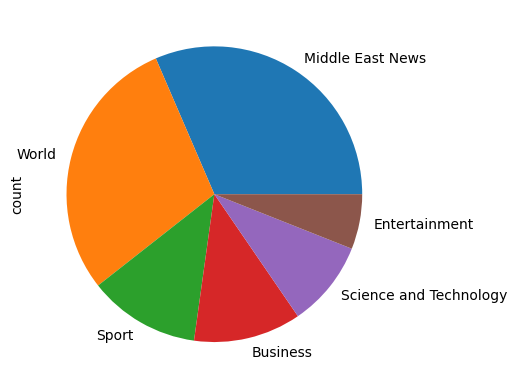

In [ ]:
df.category.value_counts().plot(kind='pie')

In [ ]:
summarizer = pipeline(
                    "summarization",
                    model="csebuetnlp/mT5_multilingual_XLSum",
                    temperature=0.7,
                    top_k=50,
                    top_p=0.9,
                    repetition_penalty=1.2,
                    length_penalty=0.8,
                    )

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:560: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
generator = pipeline(
                "text-generation",
                model="bigscience/bloom-1b1",
                temperature=0.7,
                top_k=50,
                top_p=0.9,
                repetition_penalty=1.2,
                length_penalty=0.8,
                do_sample = False,
                device=device)

config.json:   0%|          | 0.00/693 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.13G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [ ]:
sport_articles = df[df['category'] == 'Sport']['Body'].tolist()
text = sport_articles[99]
text

'. - خليجي : فوز كبير للابيض.. وتعادل الاخضر والعنابي سلبيا  ( +:) - // خليجي : فوز كبير للابيض.. وتعادل الاخضر والعنابي سلبيا الابيض يجمع اول نقاط بمشوار الدفاع عن لقبه مسقط، سلطنه عمان ( )-- افتتح المنتخب الاماراتي مبارياته في بطوله كاس الخليج التاسعه عشر للدفاع عن لقبه، بفوز كبير علي نظيره اليمني في اللقاء الذي جمع بينهما الاثنين، ضمن منافسات المجموعه الثانيه، فيما تعادل منتخبا السعوديه وقطر سلبيا. استهل محمد عمر مهاجم الامارات اهداف المباراه مبكرا، حيث احرز الهدف الاول لفريقه بعد مرور ست دقاءق، من ركله جزاء احتسبها الحكم العراقي كاظم عوده. وفي الدقيقه  اضاف اسماعيل الحمادي الهدف الثاني للمنتخب الاماراتي، لينتهي الشوط الاول بفوز "الابيض" بهدفين نظيفين. واختتم محمد الشحي الثلاثيه الاماراتيه في الدقيقه ، الا ان الدقيقه الاخيره من المباراه شهدت هدفا للمنتخب اليمني، احرزه علي النونو، ليحصد المنتخب الاماراتي اول ثلاث نقاط في "خليجي ." روابط ذات علاقه الاهلي يسمح للمحمدي بالمشاركه في مباراتين بـ"خليجي " البحرين تهزم العراق في لقاء مثير وتعادل عمان والكويت سلبيا وقد حفلت المباراه بالعديد م

In [ ]:
summary_article_99 = summarizer(text)
summary_article_99

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


[{'summary_text': '( ) - افتتح المنتخب الاماراتي مبارياته في بطوله كاس الخليج التاسعه عشر للدفاع عن لقبه، بفوز كبير علي نظيره اليمني في اللقاء الذي جمع بينهما الاثنين، فيما تعادل منتخب عمان والكويت سلبيا.'}]

In [ ]:
import re
# Define a regular expression pattern to match Arabic characters
arabic_pattern = re.compile("[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF]+")

# Function to extract Arabic text from a string
def extract_arabic(text):
    return " ".join(arabic_pattern.findall(text))

# Apply the function to the 'summary_text' field in the data
arabic_text = extract_arabic(summary_article_99[0]['summary_text'])

arabic_text

'افتتح المنتخب الاماراتي مبارياته في بطوله كاس الخليج التاسعه عشر للدفاع عن لقبه، بفوز كبير علي نظيره اليمني في اللقاء الذي جمع بينهما الاثنين، فيما تعادل منتخب عمان والكويت سلبيا'

In [ ]:
new_text = generator(arabic_text,max_length=50)
# Apply the function to the 'generated_text' field in the data
new_arabic_text = extract_arabic(new_text[0]['generated_text'])

new_arabic_text

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:554: UserWarning: `num_beams` is set to 1. However, `length_penalty` is set to `0.8` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `length_penalty`.
  warnings.warn(


'افتتح المنتخب الاماراتي مبارياته في بطوله كاس الخليج التاسعه عشر للدفاع عن لقبه، بفوز كبير علي نظيره اليمني في اللقاء الذي جمع بينهما الاثنين، فيما تعادل منتخب عمان والكويت سلبيا مع كل من البحرين وال'

In [ ]:
def process_category(df, category, summarizer, extract_arabic, generator, max_length=100):
  merged_df = df.copy()
  for text in df[df['category'] == category]['Body'].tolist():
    summary = summarizer(text)
    extracted_text = extract_arabic(summary[0]['summary_text'])
    generated_text = generator(extracted_text, max_length=max_length)
    new_text = extract_arabic(generated_text[0]['generated_text'])
    merged_df = pd.concat([merged_df, pd.DataFrame({'Body': [new_text], 'category': [category]})], ignore_index=True)
  return merged_df

## Augmenting Sport Articles

In [ ]:
# Call the function for each category
merged_df = process_category(df.copy(), 'Sport', summarizer, extract_arabic, generator)

In [ ]:
merged_df.category.value_counts().plot(kind='pie')

In [ ]:
merged_df.to_csv('df_with_sport_augmented.csv',index=False)

# Augmenting Business Articles

In [ ]:
# df = merged_df.copy()

In [ ]:
Business_df = process_category(df.copy(), 'Business', summarizer, extract_arabic, generator)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


In [ ]:
Business_df.shape

In [ ]:
Business_df.category.value_counts().plot(kind='pie')

In [ ]:
Business_df.to_csv('df_with_sport_business_augmented.csv',index=False)

# Augmenting Science and Technology

In [ ]:
df = Business_df.copy()

In [ ]:
scitech_df = process_category(df.copy(), 'Science and Technology', summarizer, extract_arabic, generator)

In [ ]:
scitech_df.category.value_counts().plot(kind='pie')

# Augmenting Entertainment

In [ ]:
df = scitech_df.copy()

In [ ]:
entertainment_df = process_category(df.copy(), 'Entertainment', summarizer, extract_arabic, generator)

In [ ]:
entertainment_df.category.value_counts().plot(kind='pie')

# INTAHA

In [ ]:
entertainment_df.to_csv('train_data.csv',index=False)